# Time series analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# a package specifically used when you have to search some files which have some special kind of extension ...
# ... or if it has some specific file pattern

In [4]:
import glob

In [5]:
glob.glob(r'C:\Users\zerou\Desktop\Project2 - Time Series S&P 500\S&P_resources\individual_stocks_5yr\*csv')

['C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individua

In [6]:
len(glob.glob(r'C:\Users\zerou\Desktop\Project2 - Time Series S&P 500\S&P_resources\individual_stocks_5yr\*csv'))

505

In [7]:
company_list = [
    r'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\zerou\\Desktop\\Project2 - Time Series S&P 500\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv'
    
]

In [8]:
# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Iterate through each file in company_list
for file in company_list:
    # Read the current CSV file into a DataFrame
    current_df = pd.read_csv(file)
    
    # Concatenate the current DataFrame with all_data
    all_data = pd.concat([all_data, current_df], ignore_index=True)

# Now, all_data contains the concatenated data from all CSV files

In [9]:
all_data.shape

(4752, 7)

In [10]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [11]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [12]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [ ]:
# convertim date in date-time function

In [15]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [16]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [17]:
# Extragem cele 4 nume

tech_list = all_data['Name'].unique()

In [18]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

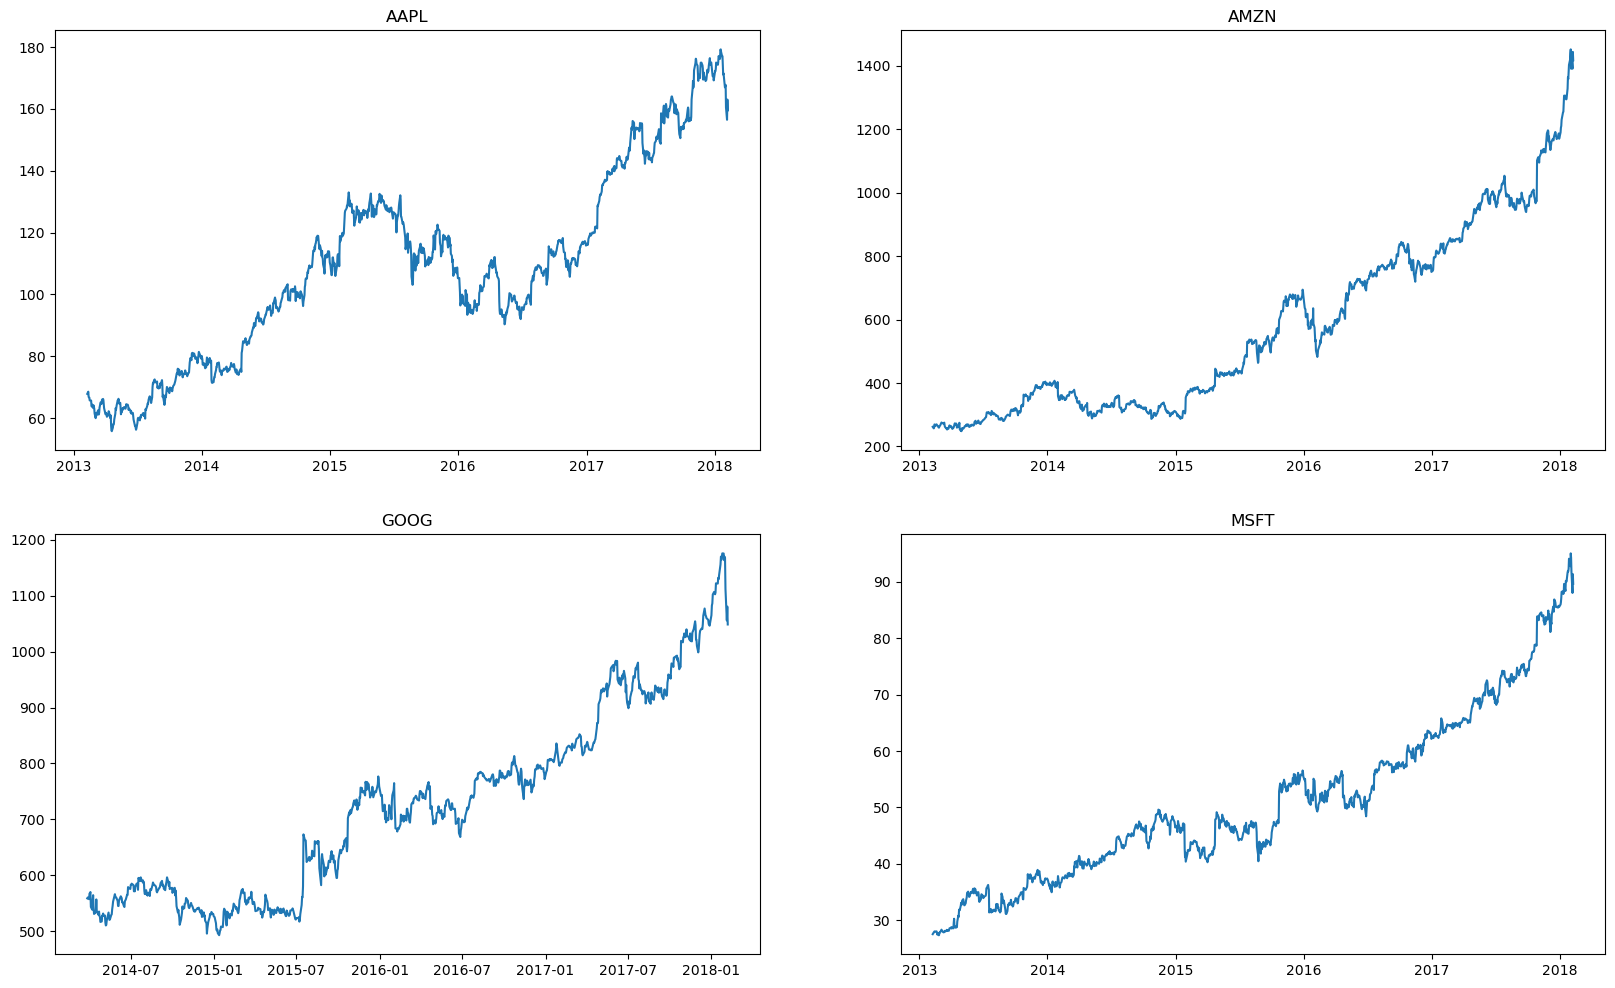

In [23]:
# de ce 2, 2 -> facem un array pt ca sunt 4 companii, deci 2 coloane pe 2 randuri
# ultimul este indexul
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

### Moving average
A statistic that computes the average change in a data over some specific interval
Adica pe un window de x zile, facem media, practic comprimam. Apoi decalam cu o zi, nu trecem la urmatoarele 10 zile! vezi poza

In [24]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [28]:
# rolling: delta etc. cred ca face rolling pe randurile precedente

all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [29]:
new_data = all_data.copy()

In [31]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()
    

In [34]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT,92.525,91.0535,87.4328


In [35]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [36]:
new_data.set_index('date', inplace=True)

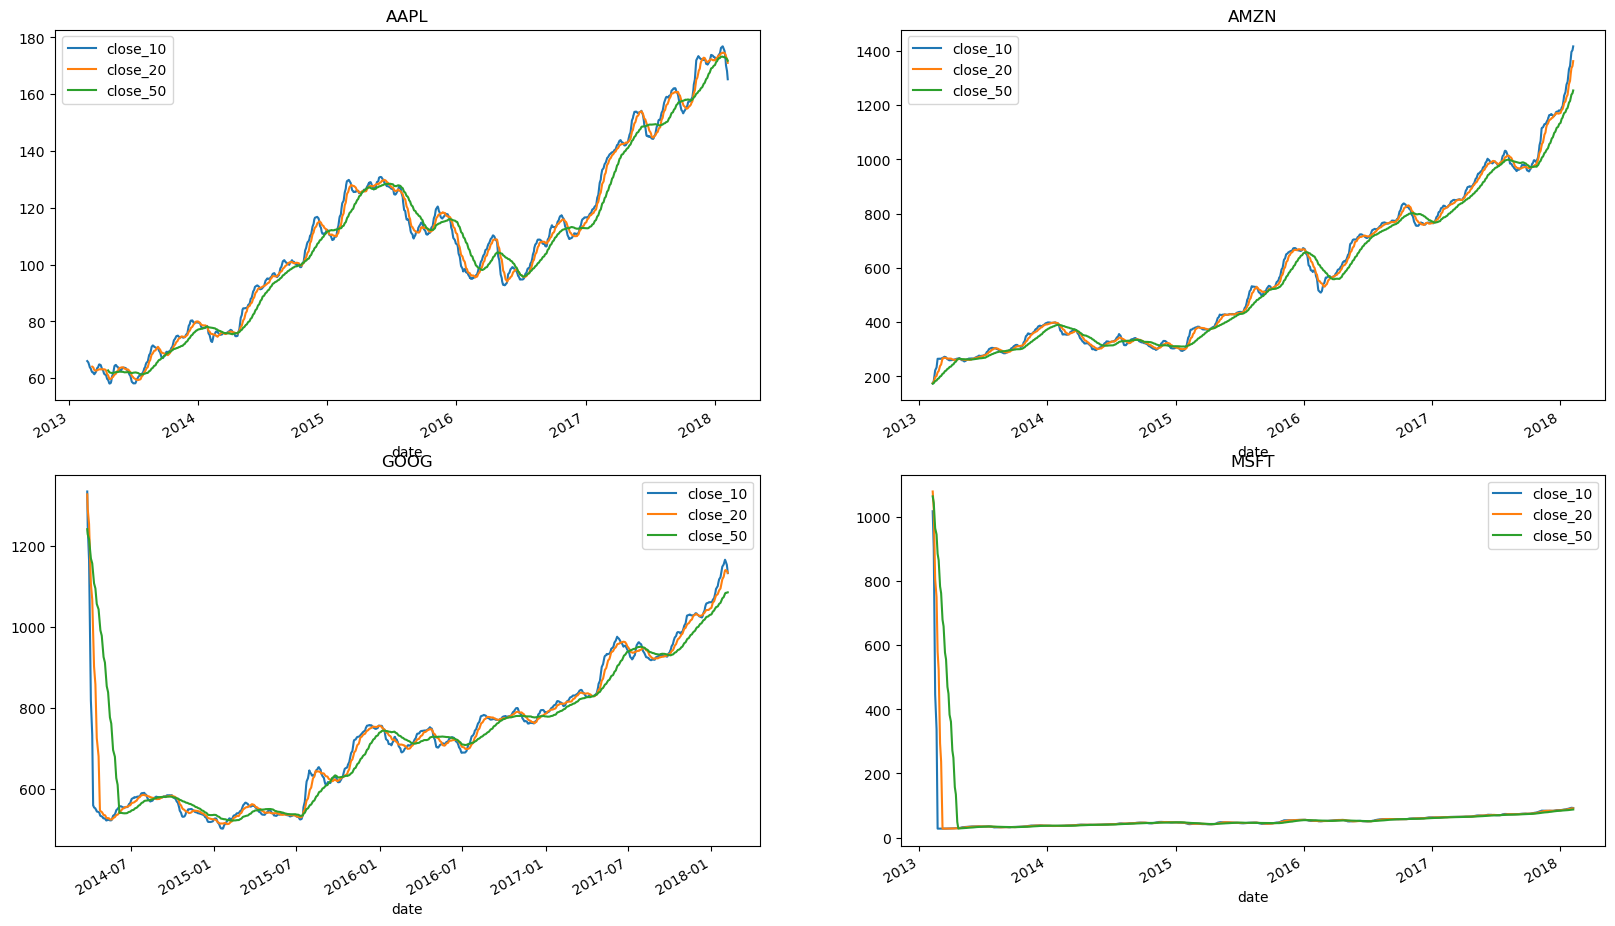

In [41]:
# data trecuta am folosit matplotlib (plt), acum folosim pandas. pt pandas trebuie sa setam indexul (mai sus)

plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

### Observing closing price change
For Apple stock

In [42]:
company_list

['C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [44]:
apple = pd.read_csv(r'C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [45]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [50]:
# pct_change function: the percentage change between the current and prior element

apple['Daily return %'] = apple['close'].pct_change() * 100

In [51]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return %
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [52]:
import plotly.express as px

In [54]:
px.line(apple, x='date', y='Daily return %')

### Resampling analysis of closing price
Resampling, in context of time series. For example, resampling on yearly basis, or quarters
date -> row index (if using pandas)

In [55]:
apple.dtypes

date               object
open              float64
high              float64
low               float64
close             float64
volume              int64
Name               object
Daily return %    float64
dtype: object

In [56]:
apple['date'] = pd.to_datetime(apple['date'])

In [57]:
apple.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
Name                      object
Daily return %           float64
dtype: object

In [58]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return %
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [59]:
apple.set_index('date', inplace=True)

In [60]:
apple.head(4)

,open,high,low,close,volume,Name,Daily return %
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [61]:
# resampling. ne da average closing price pe fiecare luna. putem inlocui M cu D, Y, Q=quarter

apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

In [62]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

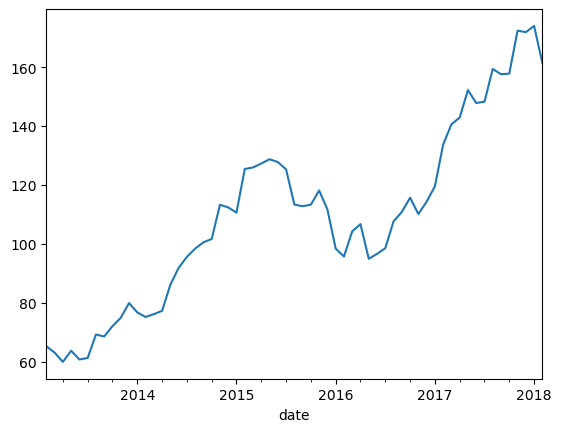

In [63]:
# pt plot doar punem .plot la sf

apple['close'].resample('M').mean().plot()

# Correlation analysis
Checking if the closing prices of those 4 companies are correlated or not

To tell whether the closing price are correlated with each other or not

In [65]:
company_list

['C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [66]:
company_list[0]

'C:\\\\Users\\\\zerou\\\\Desktop\\\\Project2 - Time Series S&P 500\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [67]:
appl = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
ggle = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [68]:
closing_price = pd.DataFrame()

In [69]:
closing_price['appl_close'] = appl['close']
closing_price['amzn_close'] = amzn['close']
closing_price['ggle_close'] = ggle['close']
closing_price['msft_close'] = msft['close']

In [70]:
closing_price

,appl_close,amzn_close,ggle_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


C:\Users\zerou\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



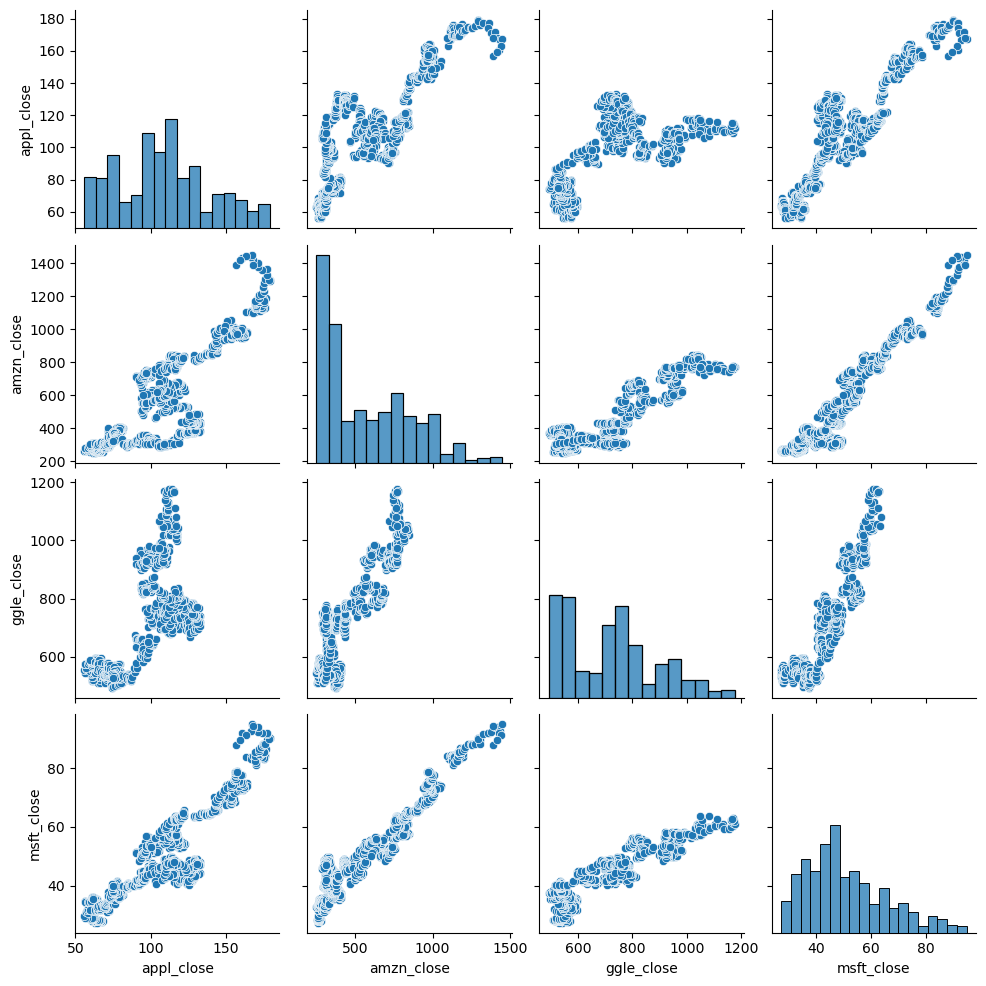

In [71]:
sns.pairplot(closing_price)

In [ ]:
# between amazon and msft we have an almost straight line, a higher correlation

In [72]:
closing_price.corr()

,appl_close,amzn_close,ggle_close,msft_close
appl_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
ggle_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

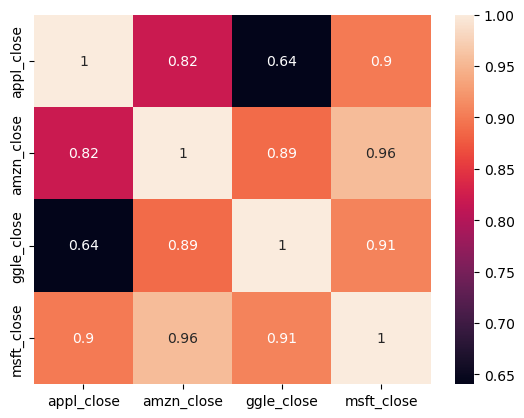

In [73]:
sns.heatmap(closing_price.corr(), annot=True)

### Whether the Daily change in closing price of stocks OR Daily returns in stock are corelated or not

In [ ]:
# kde = kernel density estimation

In [74]:
closing_price

,appl_close,amzn_close,ggle_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [76]:
closing_price['appl_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: appl_close, Length: 1259, dtype: float64

In [79]:
# scade din randul actual randul precedent samd (68.5614 - 67.8542)

closing_price['appl_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: appl_close, Length: 1259, dtype: float64

In [80]:
closing_price['appl_close'] - closing_price['appl_close'].shift(1)

0          NaN
1       0.7072
2      -1.7186
3      -0.1272
4      -0.0600
         ...  
1254    0.3500
1255   -7.2800
1256   -4.0100
1257    6.5400
1258   -3.4900
Name: appl_close, Length: 1259, dtype: float64

In [83]:
# to get the percentage change

(closing_price['appl_close'] - closing_price['appl_close'].shift(1))/closing_price['appl_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: appl_close, Length: 1259, dtype: float64

In [84]:
# loop ca sa obtinem si pt celelalte companyy

for col in closing_price.columns:
    closing_price[col+'_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [85]:
closing_price.columns

Index(['appl_close', 'amzn_close', 'ggle_close', 'msft_close',
       'appl_close_pct_change', 'amzn_close_pct_change',
       'ggle_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [87]:
closing_p = closing_price[['appl_close_pct_change', 'amzn_close_pct_change',
       'ggle_close_pct_change', 'msft_close_pct_change']]

In [88]:
closing_p

,appl_close_pct_change,amzn_close_pct_change,ggle_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


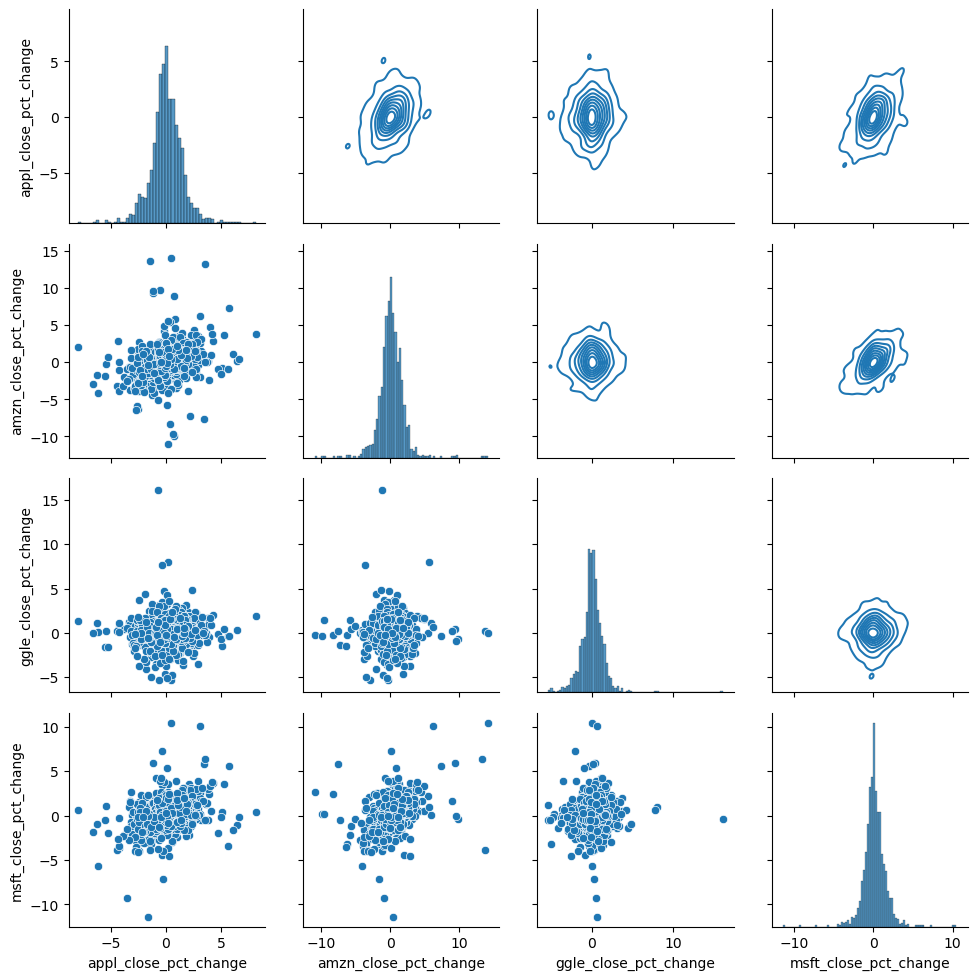

In [91]:
g = sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [92]:
closing_p.corr()

,appl_close_pct_change,amzn_close_pct_change,ggle_close_pct_change,msft_close_pct_change
appl_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
ggle_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000


In [93]:
# if Amazon stock decreases, it is a 40.2678% probability that Microsoft also decreases